# Evolution of Global Temperature Anomalies Analysis 
## Linear Regression Model for Predicting Global Average Temperature Anomalies Across Three Centuries

#### The following analysis aims to provide an accurate estimation of how global temperature deviation is increasing over the last centuries.
- Data Exploration
- Data Visualization
- Linear Regression Model
- RMSE analysis
- Anova table

*Data Source: Nasa GISS Global Temperature*

**Author: Roberto Daniel Totolici**

In [216]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [217]:
data = pd.read_csv("GLB.Ts+dSST.csv", sep = ',', skiprows=1)

Let's look at the data

In [218]:
data.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.24,-.08,-.16,-.09,-.20,-.17,-.10,-.13,-.23,-.21,-.17,-.16,***,***,-.11,-.16,-.19
1,1881,-0.19,-0.13,.04,.06,.06,-.18,.01,-.03,-.15,-.21,-.18,-.07,-.08,-.09,-.16,.05,-.07,-.18
2,1882,0.17,0.14,.04,-.16,-.14,-.23,-.16,-.07,-.14,-.23,-.16,-.35,-.11,-.08,.08,-.09,-.15,-.18
3,1883,-0.29,-0.36,-.12,-.18,-.17,-.08,-.06,-.13,-.21,-.10,-.22,-.10,-.17,-.19,-.33,-.15,-.09,-.18
4,1884,-0.12,-0.07,-.35,-.39,-.33,-.35,-.29,-.27,-.26,-.24,-.33,-.30,-.28,-.26,-.10,-.36,-.30,-.28


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    object 
 4   Apr     145 non-null    object 
 5   May     145 non-null    object 
 6   Jun     145 non-null    object 
 7   Jul     145 non-null    object 
 8   Aug     145 non-null    object 
 9   Sep     145 non-null    object 
 10  Oct     145 non-null    object 
 11  Nov     145 non-null    object 
 12  Dec     145 non-null    object 
 13  J-D     145 non-null    object 
 14  D-N     145 non-null    object 
 15  DJF     145 non-null    object 
 16  MAM     145 non-null    object 
 17  JJA     145 non-null    object 
 18  SON     145 non-null    object 
dtypes: float64(2), int64(1), object(16)
memory usage: 21.7+ KB


The data has 145 entries and 19 columns which includes the year, the temperature over the months, and some relevant periods.

We rename the relevant periods into a more friendly name

In [220]:
data = data.rename(columns={
    'J-D': 'Jan-Dec',
    'D-N': 'Dec-Nov',
    'DJF': 'Dec-Jan-Feb',
    'MAM': 'Mar-Apr-May',
    'JJA': 'Jun-Jul-Aug',
    'SON': 'Sep-Oct-Nov'
})


We transform our columns into numeric, as they were object class

In [221]:
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors = 'coerce')

For the seek of simplicity we drop the 2024 year row as we still don't have the full data for it 

In [222]:
data = data.drop(data.index[-1])

Now, let's analyze how many NA's values are, and where are located in the dataset

In [223]:
data.isna().sum().sum()

2

In [224]:
na_cols = data.columns[data.isna().any()].to_list()

In [225]:
na_cols

['Dec-Nov', 'Dec-Jan-Feb']

We fill the NA's values with a backward fill 

In [226]:
data.bfill()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan-Dec,Dec-Nov,Dec-Jan-Feb,Mar-Apr-May,Jun-Jul-Aug,Sep-Oct-Nov
0,1880,-0.17,-0.24,-0.08,-0.16,-0.09,-0.20,-0.17,-0.10,-0.13,-0.23,-0.21,-0.17,-0.16,-0.09,-0.16,-0.11,-0.16,-0.19
1,1881,-0.19,-0.13,0.04,0.06,0.06,-0.18,0.01,-0.03,-0.15,-0.21,-0.18,-0.07,-0.08,-0.09,-0.16,0.05,-0.07,-0.18
2,1882,0.17,0.14,0.04,-0.16,-0.14,-0.23,-0.16,-0.07,-0.14,-0.23,-0.16,-0.35,-0.11,-0.08,0.08,-0.09,-0.15,-0.18
3,1883,-0.29,-0.36,-0.12,-0.18,-0.17,-0.08,-0.06,-0.13,-0.21,-0.10,-0.22,-0.10,-0.17,-0.19,-0.33,-0.15,-0.09,-0.18
4,1884,-0.12,-0.07,-0.35,-0.39,-0.33,-0.35,-0.29,-0.27,-0.26,-0.24,-0.33,-0.30,-0.28,-0.26,-0.10,-0.36,-0.30,-0.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2019,0.94,0.95,1.17,1.01,0.85,0.90,0.94,0.95,0.92,1.00,0.99,1.10,0.98,0.96,0.93,1.01,0.93,0.97
140,2020,1.17,1.24,1.17,1.13,1.01,0.91,0.89,0.87,0.98,0.87,1.10,0.80,1.01,1.04,1.17,1.10,0.89,0.98
141,2021,0.81,0.64,0.88,0.75,0.78,0.84,0.92,0.82,0.92,0.99,0.94,0.86,0.85,0.84,0.75,0.81,0.86,0.95
142,2022,0.91,0.89,1.05,0.83,0.84,0.92,0.94,0.95,0.89,0.96,0.73,0.80,0.89,0.90,0.89,0.91,0.94,0.86


Next,we create a new column for the Temperature Anomaly Average for each year

In [227]:
data['YearAvg'] = data.iloc[:, 1:].mean(axis=1)

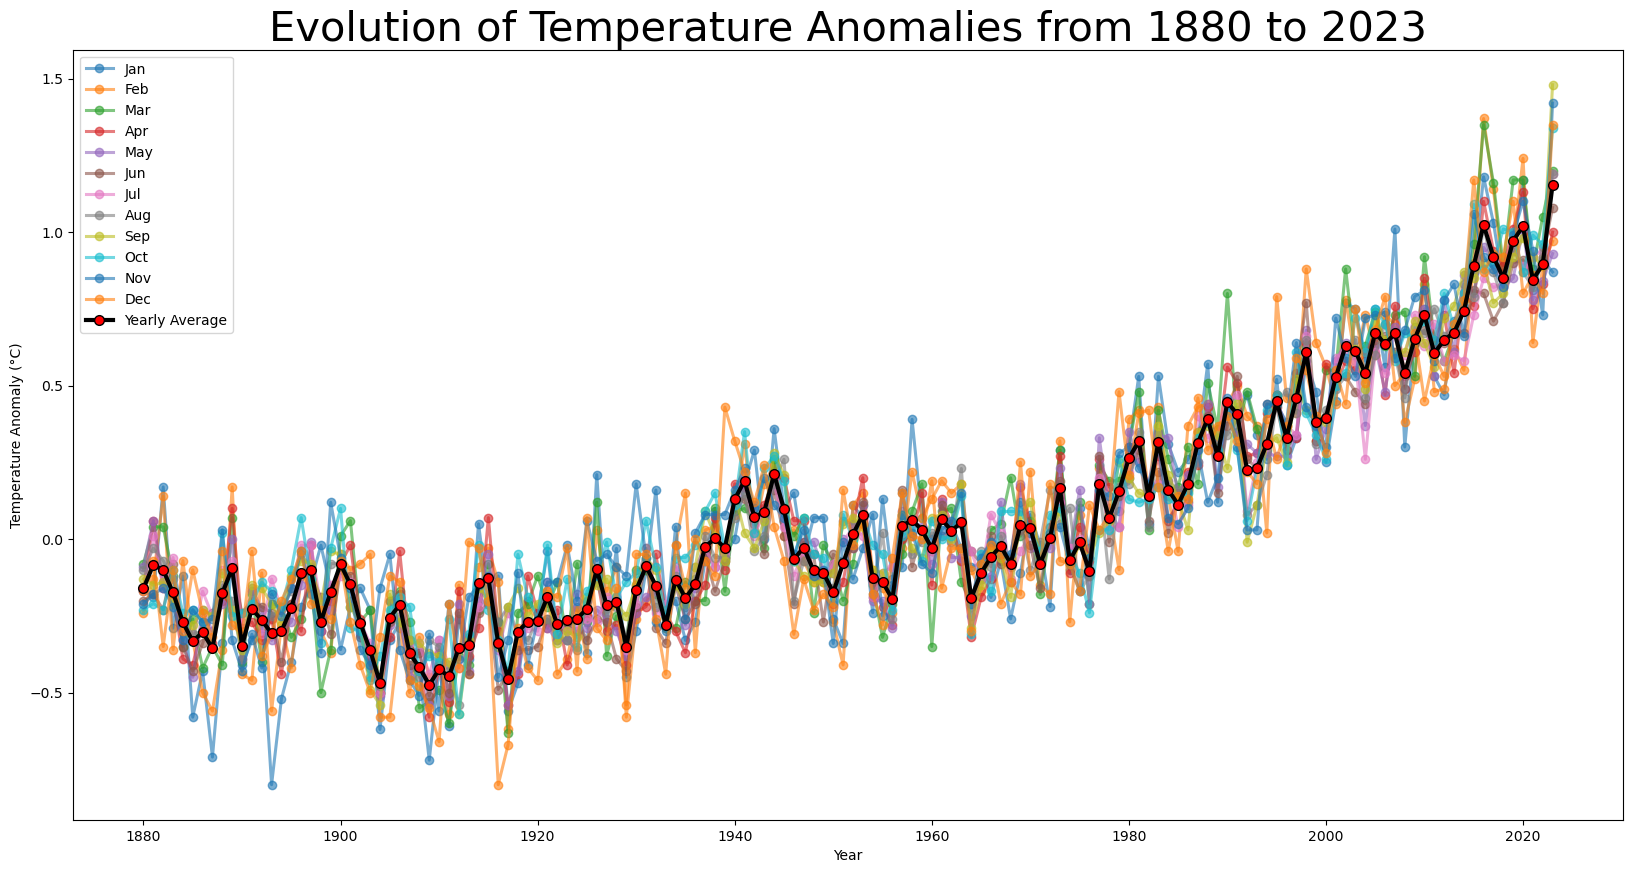

In [228]:
fig, ax = plt.subplots(figsize=(20, 10))

data.iloc[:, :13].plot(
    x='Year',
    ax=ax,
    linewidth=2.2,
    marker='o',
    alpha=0.6,
    label='Monthly Averages'  
)
data.plot(
    kind='line',
    x='Year',
    y='YearAvg',
    ax=ax,  
    linewidth=3,
    alpha=1,
    label='Yearly Average',
    color = 'black',
    marker = 'o',
    markersize = 7,
    markerfacecolor='red'
)
plt.title("Evolution of Temperature Anomalies from 1880 to 2023", fontsize = 30)
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.legend()
plt.show()


## Linear Regression Model

First let's separate the explanatory and dependent variables, in this case, we will focus on forecasting the Average Temperature Over Years.

After we make two different subsets for our variables, let's create the training and test sets

In [229]:
from sklearn.model_selection import train_test_split

X = data[['Year']]
y = data[['YearAvg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)

Afterwards ,we fit the model

In [230]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Some Predicted values

In [231]:
pred = model.predict(X_test)

## Linear Regression Fitted Line

/home/psykoss/miniconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


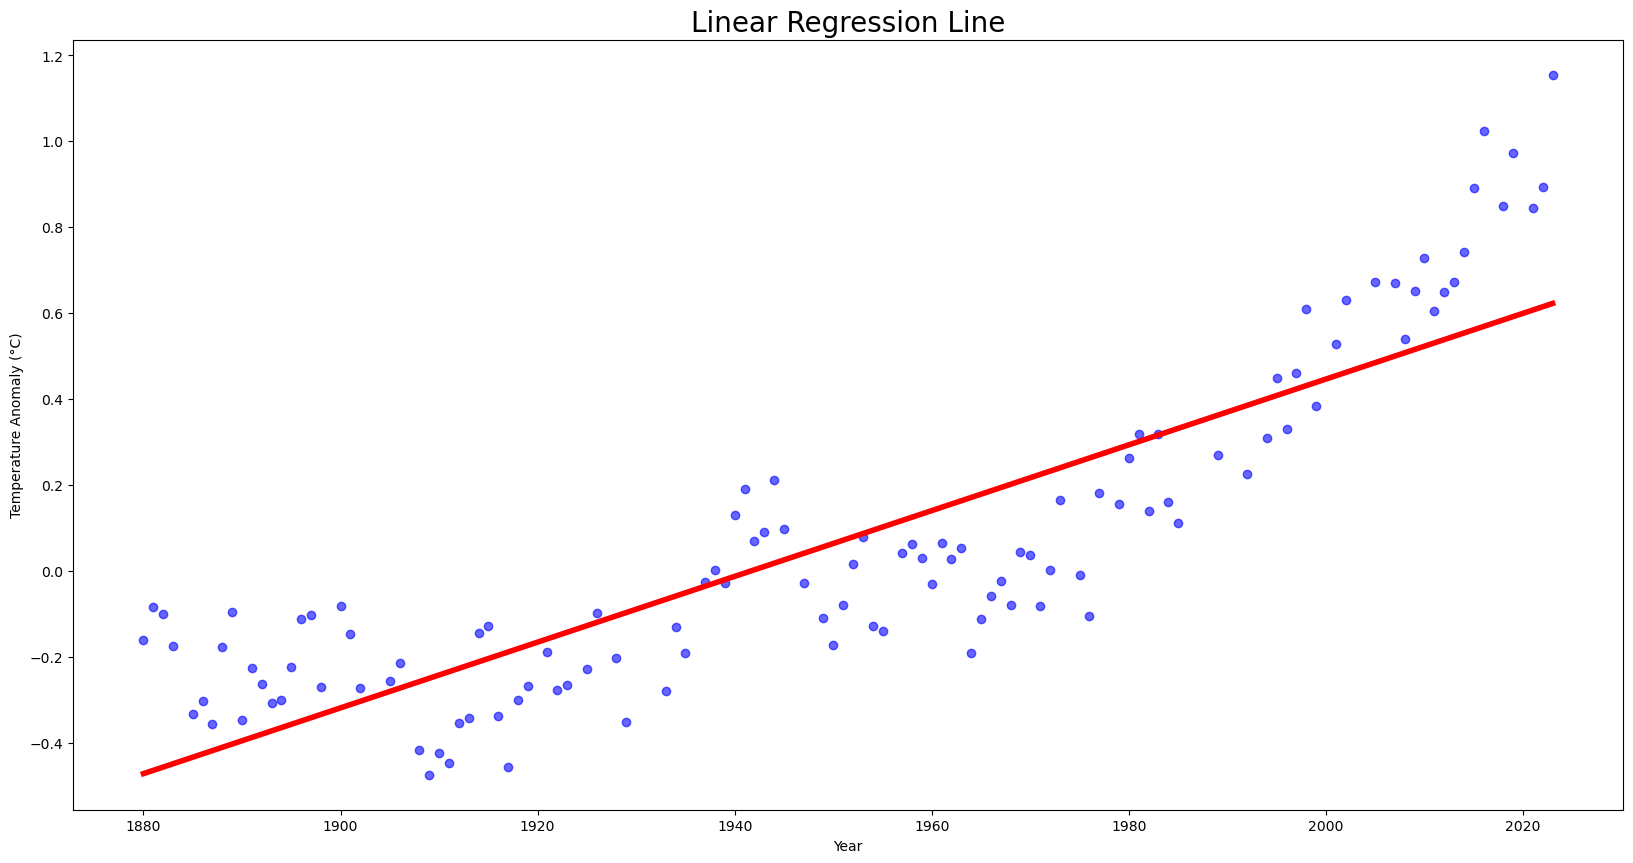

In [232]:
X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
Y_plot = model.predict(X_plot)

plt.figure(figsize=(20,10))
plt.title("Linear Regression Line", fontsize = 20)
plt.scatter(X_train, y_train, color='blue', label='Original data', alpha = 0.6)
plt.plot(X_plot, Y_plot, color='red', linewidth=4, label='Regression line')
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.show()

## RMSE Analysis

In [248]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(pred, y_test)
print(f"Root Mean Squared Error {round(rmse,4)}")

Root Mean Squared Error 0.1693


We build a 95% confidence interval for our MSE

In [249]:
squared_errors = (pred - y_test) ** 2

conf_interval = np.sqrt(stats.t.interval(0.95, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))
print(f"Lower bound : {conf_interval[0]}, Upper Bound: {conf_interval[1]}")

Lower bound : [0.1139061], Upper Bound: [0.2106324]


We fail to reject the Null Hypothesis , in other words the root mean squared error is in the Confidence Interval giving us a strong evidence that the error is stable and generalized

## ANOVA TABLE

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
model = ols('YearAvg ~ Year', data=data).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
print("R-squared: ", model.rsquared)

## Conclusion

As we can see from our ANOVA table, the pvalue of our F-statistic is very low (below any significant alpha 0.01, 0.05...) ,  which suggests a strong evidence that there are effects that the model aimed to capture. In other words, the evidence that the increase of the Average Anomaly Temperature over the years is likely not due to random chance alone.

Also, the goodness of fit allows us to explain 76.15% of how much of the variation of a dependent variable is explained by an independent variable in a regression model

## Citations

- GISTEMP Team, 2024: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.
    
    
- Lenssen, N., G. Schmidt, J. Hansen, M. Menne, A. Persin, R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.

